<a href="https://colab.research.google.com/github/Antonio-Belo/MVP_Sprint_II/blob/main/mvp_ii_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sprint II B - MACHINE LEARNING & ANALYTICS Data Science & Analytics - PUC Rio

Antonio Carlos Avallone Belo

**Processamento de Linguagem Natural - Analise de Sentimento**


Definição do Problema : O  Modelo visa interpretar os sentimentos positivamente  ou negativamente de opniões através da utilização de  NLP
  
 O Dataset IMDB PT-BR , tem  registros das opniões tradução automática de uma das bases do IMDb realizada por um membro da comunidade. Tal base consiste em aproximadamente 50 mil resenhas de filmes já classificadas como positivas ou negativas, mas em inglês. O que ele fez foi traduzir, mesmo que uma tradução automática, para o português, disponível para uso.


**   Colunas do Dataset**
   
   **id**        - Identificação

   **text_en**   - Opinião em Inglês

   **text_pt**   - Opnião Traduzida para o Portugues
  
   **sentiment** - Sentimento apresentado

# **Instalaçao e Importação**

In [220]:
!pip install gdown
import gdown
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import tokenize
from string import punctuation



# **Carga do Dataset**

In [221]:
url1 = 'https://raw.githubusercontent.com/Antonio-Belo/MVP_Sprint_II/main/imdb-reviews-pt-br1.csv'
url2 = 'https://raw.githubusercontent.com/Antonio-Belo/MVP_Sprint_II/main/imdb-reviews-pt-br2.csv'
url3 = 'https://raw.githubusercontent.com/Antonio-Belo/MVP_Sprint_II/main/imdb-reviews-pt-br3.csv'
url4 = 'https://raw.githubusercontent.com/Antonio-Belo/MVP_Sprint_II/main/imdb-reviews-pt-br4.csv'
url5 = 'https://raw.githubusercontent.com/Antonio-Belo/MVP_Sprint_II/main/imdb-reviews-pt-br5.csv'
d1 = pd.read_csv(url1, delimiter=',')
d2 = pd.read_csv(url2, delimiter=',')
d3 = pd.read_csv(url3, delimiter=',')
d4 = pd.read_csv(url4, delimiter=',')
d5 = pd.read_csv(url5, delimiter=',')
df = pd.concat([d1, d2, d3, d4 ])




### **Tratamento dos Dados**

In [222]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         39999 non-null  int64 
 1   text_en    39999 non-null  object
 2   text_pt    39999 non-null  object
 3   sentiment  39999 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


**Serparar Treino e Teste**

In [223]:


treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt,
                                                              df.sentiment,
                                                              random_state = 42)


In [224]:
classe_teste


7516    neg
3706    pos
9056    pos
32      neg
8672    pos
       ... 
3322    neg
7634    neg
3036    neg
5604    neg
2227    pos
Name: sentiment, Length: 10000, dtype: object

In [225]:
print(df.sentiment.value_counts())

neg    24765
pos    15234
Name: sentiment, dtype: int64


**Criando a Coluna de Classificação com valor inteiro**

In [226]:
classificacao = df["sentiment"].replace(["neg", "pos"], [0,1])
df["classificacao"] = classificacao
df.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39999 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             39999 non-null  int64 
 1   text_en        39999 non-null  object
 2   text_pt        39999 non-null  object
 3   sentiment      39999 non-null  object
 4   classificacao  39999 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


# **Criando representações da linguagem humana**

**Bag of Words:**

In [228]:

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [229]:
coluna = vetorizar.get_feature_names_out()
coluna

array(['Assisti', 'filme', 'ruim', 'um', 'ótimo'], dtype=object)

In [230]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=coluna)

In [231]:
matriz_esparsa.head()

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [232]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.text_pt)
print(bag_of_words.shape)

(39999, 50)


**Separando o Modelo Treino e Teste Novamente com o campo Classificação**  




In [233]:
treino, teste, classe_treino, classe_teste = train_test_split(df.text_pt,
                                                              df.classificacao,
                                                              random_state = 42)


In [234]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    regressao_logistica = LogisticRegression(solver = "lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(df, "text_pt", "classificacao"))

0.671


In [235]:
%matplotlib inline



todas_palavras = ' '.join([texto for texto in df.text_pt])

nuvem_palvras = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(todas_palavras)

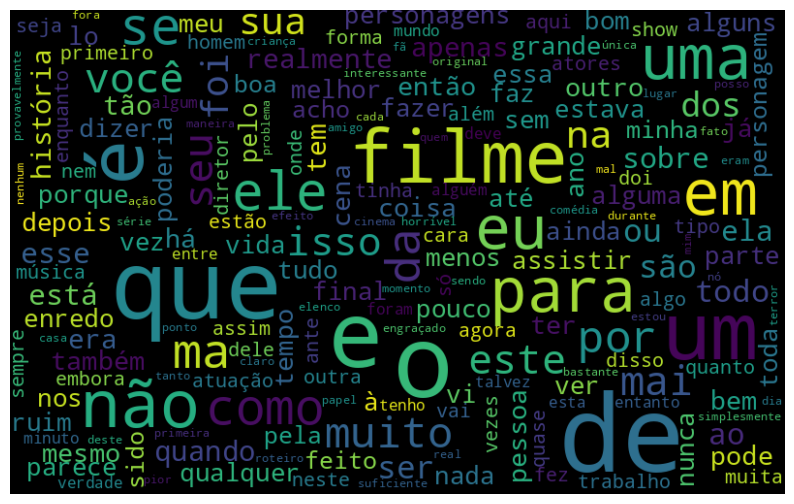

In [236]:

plt.figure(figsize=(10,7))
plt.imshow(nuvem_palvras, interpolation='bilinear')
plt.axis("off")
plt.show()

In [237]:
def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [238]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

    nuvem_palvras = WordCloud(width= 800, height= 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palvras, interpolation='bilinear')
    plt.axis("off")
    plt.show()


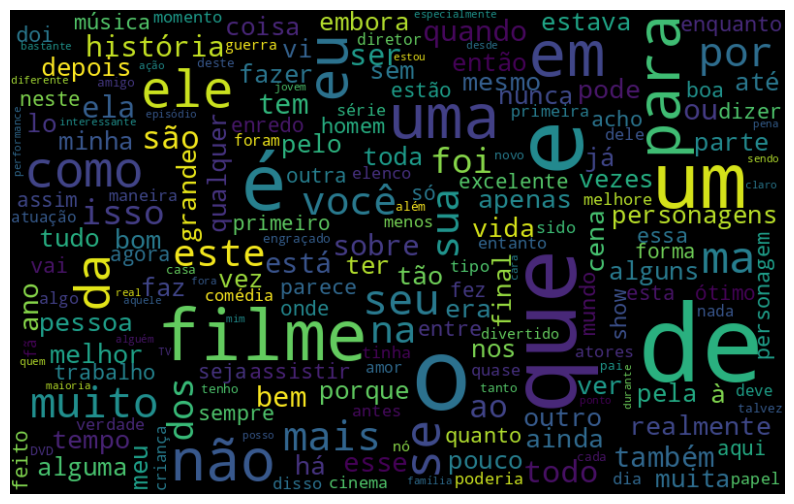

In [239]:
nuvem_palavras_pos(df, "text_pt")

## **Tokenização e a bliblioteca NLTK**

In [240]:

frase = ["um filme bom", "um filme ruim"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

In [241]:


frase = "Bem vindo ao mundo !"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['Bem', 'vindo', 'ao', 'mundo', '!']


In [242]:
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})

In [243]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,336576
14,que,263439
42,e,236579
3,o,197585
7,um,173571
102,a,168242
45,é,153629
29,não,106844
200,em,106131
1,uma,104938


### **Stop Words**

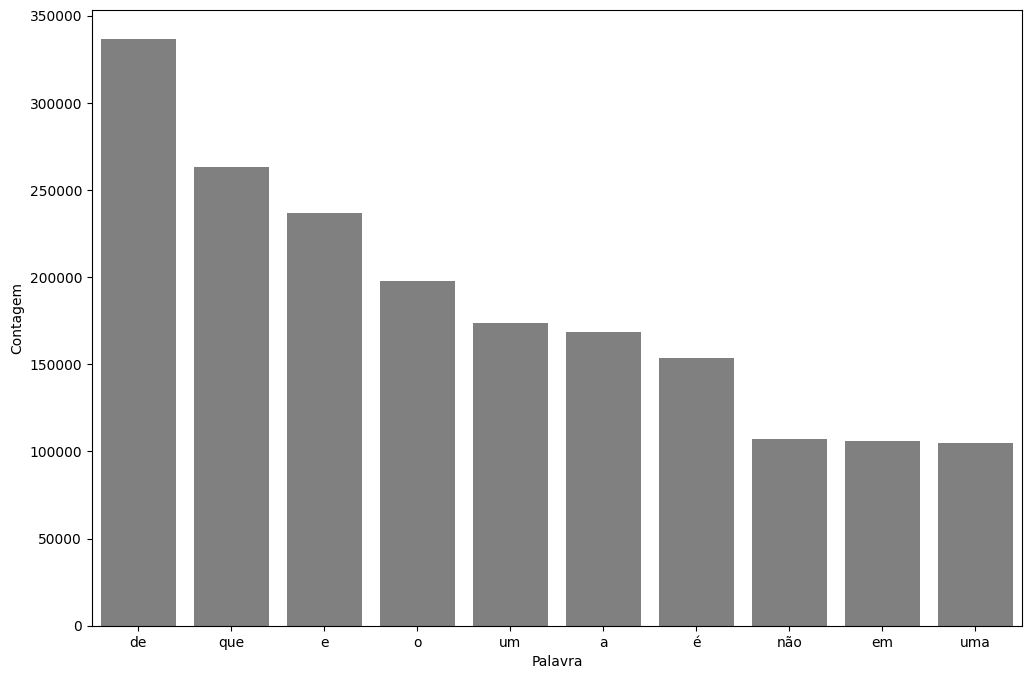

In [244]:


def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                   "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()



pareto(df, "text_pt", 10)

In [245]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [246]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in df.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_1"] = frase_processada

In [247]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [248]:
classificar_texto(df, "tratamento_1", "classificacao")

0.6951

In [249]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


**Melhorando a Visualização do Pareto**

In [250]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [258]:


pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in df["tratamento_1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_2"] = frase_processada

In [253]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


In [254]:
df["tratamento_1"][0]

0    Mais vez, Sr. Costner arrumou filme tempo nece...
0    Não apenas dinheiro pagamos alugá-lo ir cinema...
0    Gore hounds beware ... filme. Esta pequena unh...
0    Spoiler incluído, alguns diriamEste filme poss...
Name: tratamento_1, dtype: object

In [255]:
df["tratamento_2"][0]

0    Mais vez Sr Costner arrumou filme tempo necess...
0    Não apenas dinheiro pagamos alugá lo ir cinema...
0    Gore hounds beware ... filme Esta pequena unha...
0    Spoiler incluído alguns diriamEste filme possí...
Name: tratamento_2, dtype: object

# **Normalizando os Textos**

In [261]:
from unidecode import unidecode
acentos = "ótimo péssimo não é tão"

teste = unidecode(acentos)
print(teste)

otimo pessimo nao e tao


In [266]:
sem_acentos = [unidecode(texto) for texto in df["tratamento_2"]]

In [267]:
sem_acentos[0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

In [268]:
stopwords_sem_acento = [unidecode(texto) for texto in pontuacao_stopwords]

In [269]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [273]:
df["tratamento_3"] = sem_acentos

frase_processada = list()
for opiniao in df["tratamento_3"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_3"] = frase_processada

In [274]:
df.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


# **Melhorando a Acuracia**

In [276]:
acuracia_tratamento3 = classificar_texto(df, "tratamento_3", "classificacao")
print(acuracia_tratamento3)

0.6958


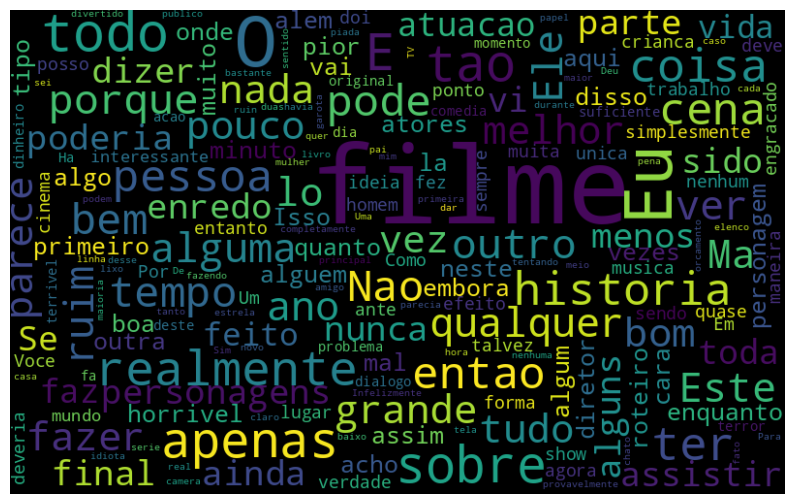

In [279]:
nuvem_palavras_neg(df, "tratamento_3")

In [280]:
frase_processada = list()
for opiniao in df["tratamento_3"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

df["tratamento_4"] = frase_processada

In [282]:
acuracia_tratamento4 = classificar_texto(df, "tratamento_4", "classificacao")
print(acuracia_tratamento4)
print(acuracia_tratamento3)

0.691
0.6958


**TF-IDF e Ngrams**

In [285]:
from sklearn.feature_extraction.text import TfidfVectorizer

frases = ["Assiti um filme ótimo", "Assiti um filme péssimo"]

tfidf = TfidfVectorizer(lowercase=False, max_features=50)

caracteristicas = tfidf.fit_transform(frases)
pd.DataFrame(
    caracteristicas.todense(),
    columns=tfidf.get_feature_names_out()
)

,Assiti,filme,péssimo,um,ótimo
0,0.448321,0.448321,0.000000,0.448321,0.630099
1,0.448321,0.448321,0.630099,0.448321,0.000000


In [286]:
tfidf_bruto = tfidf.fit_transform(df["text_pt"])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              df["classificacao"],
                                                              random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6745
